In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import fits
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 100em; }</style>"))

# open FITS files and store them all in one list
file_prefix = "lab1_3_3_series.0000000"
file_end = ".FIT"
pixel_data = [None]*10
for i in range(0, 10, 1):
    filename = file_prefix + str(i) + file_end
    list = fits.open(filename)
    image_data = list[0].data
    pixel_data[i] = image_data


In [2]:
# open a 2d list to store median values
median_values = np.zeros((1024, 1024))

# run through and calculate the median value for each pixel
for i in range(0, 1024):
    for j in range(0, 1024):
        values = [pixel_data[x][i][j] for x in range(0,10)]
        median_values[i][j] = np.median(values)
        

21825.5
15948.0


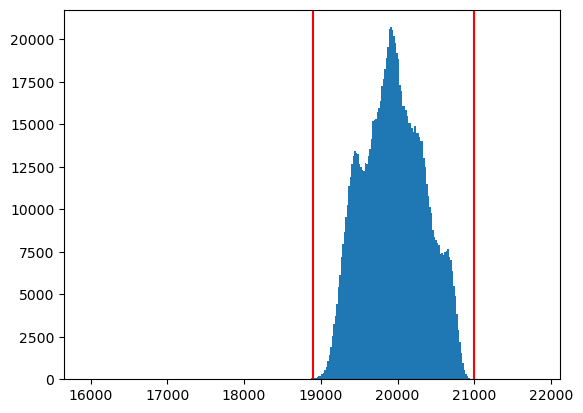

In [5]:
flat_data = median_values.flatten()
med_min = np.min(median_values)
med_max = np.max(median_values)
print(med_max)
print(med_min)
histogram = plt.hist(flat_data, range = (med_min, med_max), bins=300)
plt.axvline(18900, color='red')
plt.axvline(21000, color = 'red')
# Seems like that any pixels that are >21000 and <19000 start to not fit in
# warm pixels maybe in the range 21000-21300, hot from 21300 on

In [6]:
hot_pixels = []
warm_pixels = []
for i in range(0, 1024):
    for j in range(0, 1024):
        if median_values[i][j] >= 21300:
            hot_pixels.append([i, j])
        if 21000 < median_values[i][j] < 21300:
            warm_pixels.append([i, j])

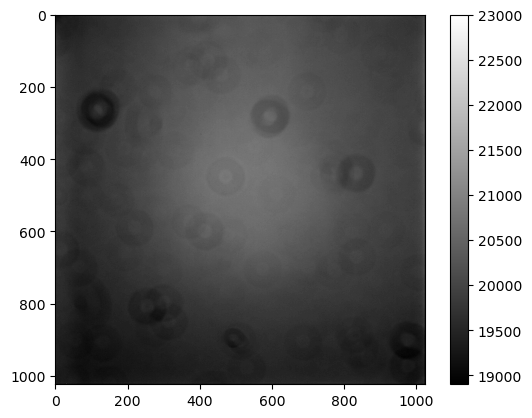

In [8]:
minimum = 18900
maximum = 23000
plt.imshow(median_values, cmap='gray', vmin=minimum, vmax=maximum)
plt.colorbar()
# plt.scatter(1022, 31, color='red', s=0.5)


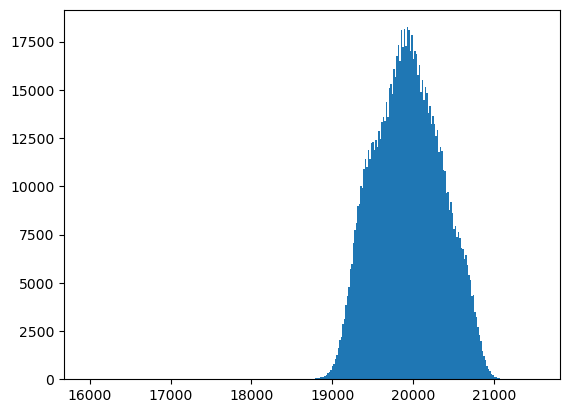

In [9]:
index = 0
flat_data = pixel_data[index].flatten()
min0 = np.min(pixel_data[index])
max0 = np.max(pixel_data[index])
histogram = plt.hist(flat_data, range = (min0, max0), bins=300)

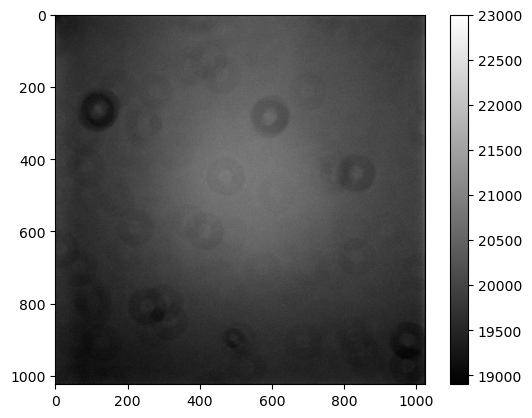

In [10]:
plt.imshow(pixel_data[1], cmap='gray', vmin=minimum, vmax=maximum)
plt.colorbar()

In [11]:
#------------Section 4.2---------------

In [3]:
file_pre = "lab1_dark.000000"
file_suf = ".DARK.FIT"

series_data = [None] * 12 
for i in range(0, 12):
    if i < 8:
        file_pref = file_pre + '0'
        file_name = file_pref + str(i + 2) + file_suf
        list = fits.open(file_name)
        image_data = list[0].data
        series_data[i] = image_data
    else:
        file_name = file_pre + str(i + 2) + file_suf
        list = fits.open(file_name)
        image_data = list[0].data
        series_data[i] = image_data


In [4]:
from scipy import stats

mins = [950]*6 + [970] * 6
maxs = [1030]*2 + [1050]*5 + [1060]*2 + [1070] + [1080]*2
mean_counts = []
st_devs = []
stat_uncs = []

for i in range(0,12):
    flat_data = series_data[i].flatten()

    series_min = mins[i]
    series_max = maxs[i]
    data_set = []
    for j in range(0, len(flat_data)):
        if series_min < flat_data[j] < series_max:
            data_set.append(flat_data[j])

    mean = np.mean(data_set)
    mean_counts.append(mean)
    st_dev = stats.tstd(data_set)
    st_devs.append(st_dev)
    stat_unc = mean / np.sqrt(len(data_set))
    stat_uncs.append(stat_unc)
    
#     print(f"standard deviation is {st_dev:.4f}")
#     print(f"mean = {mean:.4f}")

# histogram = plt.hist(data_set, range = (series_min, series_max), bins=300)
# plt.axvline(mean, color='red', label="Mean")
# plt.legend()
# plt.show()

# Mean for lab1_dark.00000002.DARK.FIT with range (950 - 1030) = 988.1372, std = 8.3837
# Mean for lab1_dark.00000003.DARK.FIT with range (950 = 1030) = 992.6876, std = 9.7638
# Mean for lab1_dark.00000004.DARK.FIT with range (950 - 1050) = 997.0802, std = 10.2313
# Mean for lab1_dark.00000005.DARK.FIT with range (950 - 1050) = 1001.2399, std = 
# Mean for lab1_dark.00000006.DARK.FIT with range (950 - 1050) = 1003.9371, std = 
# Mean for lab1_dark.00000007.DARK.FIT with range (950 - 1050) = 1007.1826, std = 
# Mean for lab1_dark.00000008.DARK.FIT with range (970 - 1050) = 1010.1903, std = 
# Mean for lab1_dark.00000009.DARK.FIT with range (970 - 1060) = 1012.4820, std = 
# Mean for lab1_dark.00000010.DARK.FIT with range (970 - 1060) = 1015.1818, std = 
# Mean for lab1_dark.00000011.DARK.FIT with range (970 - 1070) = 1017.9539, std = 
# Mean for lab1_dark.00000012.DARK.FIT with range (970 - 1080) = 1020.1976, std = 
# Mean for lab1_dark.00000013.DARK.FIT with range (970 - 1080) = 1023.1737, std = 

0.3068038851941253 987.5114316202646


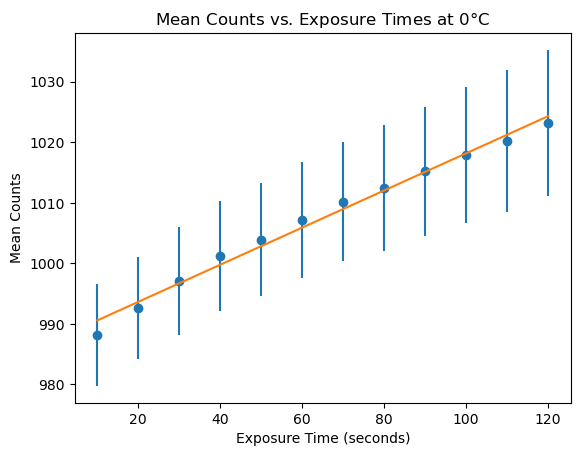

In [7]:
from scipy.optimize import curve_fit

exposure_times = [10 * x for x in range(1, 13)]
plt.scatter(exposure_times, mean_counts)
plt.errorbar(exposure_times, mean_counts, yerr=st_devs, linestyle='')
plt.xlabel("Exposure Time (seconds)")
plt.ylabel("Mean Counts")
plt.title("Mean Counts vs. Exposure Times at 0$\\degree$C")

def func(x, m, b):
    return m * x + b

parameters, covariance = curve_fit(func, exposure_times, mean_counts)
m, b = parameters
print(m, b)
y_values = [func(x, m, b) for x in exposure_times]
plt.plot(exposure_times, y_values)

Testing Pushing